## Dataset Paper
https://vision.ece.ucsb.edu/sites/default/files/publications/nataraj_vizsec_2011_paper.pdf

In [45]:
# Imports
import tensorflow as tf
import numpy as np
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [46]:
# Load the data
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/malimg_paper_dataset_imgs",
    validation_split=0.2,
    subset="training",
    seed=123,
    labels="inferred",
    label_mode="int",
    color_mode="grayscale",
    shuffle=False,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/malimg_paper_dataset_imgs",
    validation_split=0.2,
    subset="validation",
    seed=123,
    labels="inferred",
    label_mode="int",
    color_mode="grayscale",
    shuffle=False,
)

Found 9339 files belonging to 25 classes.
Using 7472 files for training.
Found 9339 files belonging to 25 classes.
Using 1867 files for validation.


In [48]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/malimg_paper_dataset_imgs",
    seed=123,
    labels="inferred",
    label_mode="int",
    color_mode="grayscale",
    shuffle=False,
)

# Split the dataset into training, validation and test sets
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = int(0.1 * len(dataset))

class_names = dataset.class_names
train_ds = dataset.take(train_size)
test_ds = dataset.skip(train_size)
val_ds = test_ds.skip(val_size)

Found 9339 files belonging to 25 classes.


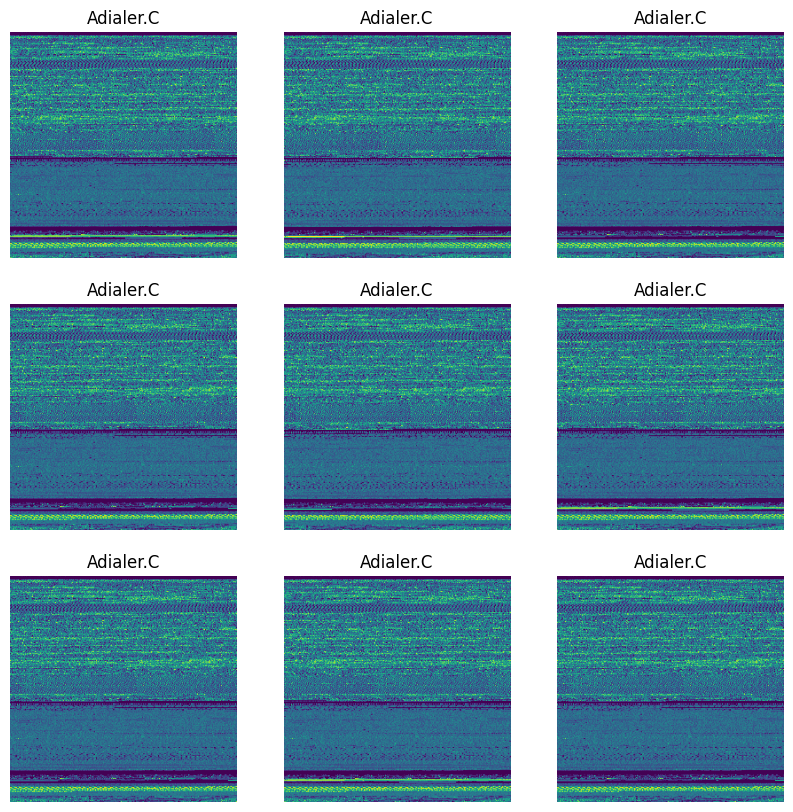

In [49]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")


In [50]:
num_classes = len(class_names)

# Setup data augmentation to prevent overfitting
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
  ]
)

model = tf.keras.Sequential([
  # data_augmentation,
  # Rescale the pixel values to the [0, 1] range.
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])


In [51]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [52]:
epochs = 5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/5
233/233 [==============================] - 217s 915ms/step - loss: 28.5273 - accuracy: 0.6230 - val_loss: 27.3997 - val_accuracy: 0.0000e+00
Epoch 2/5
233/233 [==============================] - 7947s 34s/step - loss: 2.0354 - accuracy: 0.7736 - val_loss: 34.1493 - val_accuracy: 0.0000e+00
Epoch 3/5
233/233 [==============================] - 28613s 123s/step - loss: 0.4244 - accuracy: 0.9439 - val_loss: 61.5130 - val_accuracy: 0.0000e+00
Epoch 4/5
233/233 [==============================] - 37098s 160s/step - loss: 0.0842 - accuracy: 0.9914 - val_loss: 72.1732 - val_accuracy: 0.0000e+00
Epoch 5/5
233/233 [==============================] - 11959s 52s/step - loss: 0.0155 - accuracy: 0.9987 - val_loss: 84.0393 - val_accuracy: 0.0000e+00


In [36]:
# Save the model
model.save("malware_image_detection.h5")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


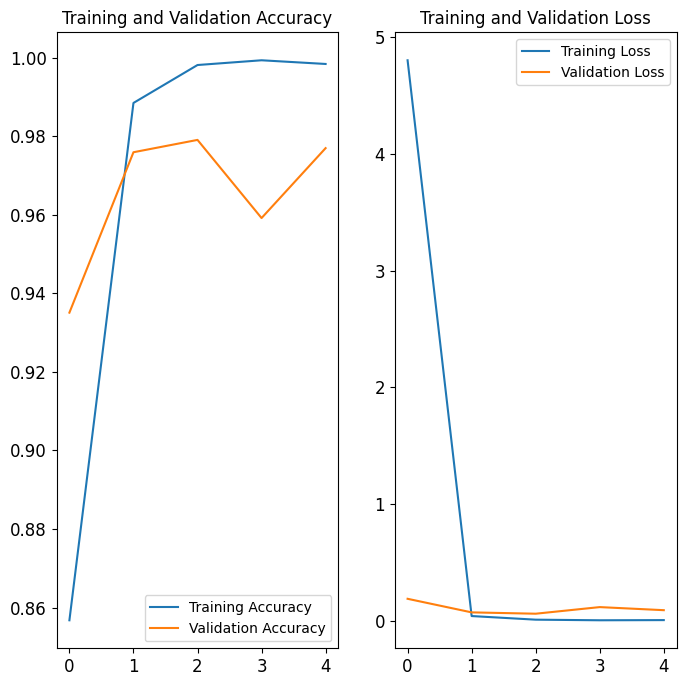

In [33]:
# Plot the training and validation accuracy and loss at each epoch
# https://www.tensorflow.org/tutorials/images/classification#visualize_training_results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [35]:
# Evaluate the model on the test data using `evaluate`
eval_res = model.evaluate(test_ds, verbose=2)

eval_res

59/59 - 8s - loss: 0.0758 - accuracy: 0.9777 - 8s/epoch - 138ms/step


[0.07580781728029251, 0.9776951670646667]

## Making Predictions

In [37]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])


In [38]:
predictions = probability_model.predict(test_ds)

59/59 [==============================] - 9s 92ms/step


In [15]:
np.argmax(predictions[0])

3

In [44]:
# Get the predicted class with the highest probability for each sample
pred = [np.argmax(i) for i in predictions][:5]

print(pred) 
print(label)
# Get the true labels
# true_labels = []
# for _, labels in val_ds:
#   for label in labels:
#     true_labels.append(label)
# true_labels = []
# for _, labels in test_ds:
#   for label in labels:
#     true_labels.append(label)

# # Get the summary statistics
# from sklearn.metrics import classification_report

# print(classification_report(true_labels, preds))

# matrix = tf.math.confusion_matrix(
#     true_labels, preds, num_classes=None, weights=None, dtype=tf.dtypes.int32,
#     name=None
# )

# # Plot the confusion matrix
# import seaborn as sns

# plt.figure(figsize=(10, 10))
# sns.heatmap(matrix, annot=True, fmt='g')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()



IndexError: invalid index to scalar variable.